Author: Ze Hong (Jason) Wu

## Description

This Kaggle notebook contains supervised learning work done on the Rain in Australia data set:

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

This work is for NJIT's DS 675 Machine Learning course.

## Initial Steps: Adding Data

This is a Kaggle notebook, which allows me to add Kaggle datasets to the notebook using the File->Add Input option. If you are trying to replicate this on Google Colab, you might want to download the Rain in Australia dataset to your Google Drive before linking it to your notebook. If you are trying to replicate this locally, you might want to download and unzip the dataset to your local directory.

In [1]:
! ls /kaggle/input/

weather-dataset-rattle-package


In [1]:
# This is the default Kaggle opening notebook cell.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


## Exploratory Inspection

I will begin by looking at the data set and making sure everything is in place.

Adjust the read_csv directory to wherever you placed the .csv file, if necessary.

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv") # Adjust as needed
df = df.replace(np.nan, None) # for ease of work later on
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,None,None,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,None,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,None,None,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,None,None,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,None,None,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,None,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,None,None,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,None,None,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,None,None,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,None,None,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,None,None,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,None,None,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,None,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,None,None,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,None,None,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,None,None,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,None,None,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,None,None,W,28.0,S,...,58.0,27.0,1007.0,1005.7,None,None,20.1,28.2,Yes,No


In [5]:
# Just to test a hunch.

len(df), len(df.dropna())

(145460, 56420)

In [6]:
len(df), df.isna().sum()

(145460,
 Date                 0
 Location             0
 MinTemp           1485
 MaxTemp           1261
 Rainfall          3261
 Evaporation      62790
 Sunshine         69835
 WindGustDir      10326
 WindGustSpeed    10263
 WindDir9am       10566
 WindDir3pm        4228
 WindSpeed9am      1767
 WindSpeed3pm      3062
 Humidity9am       2654
 Humidity3pm       4507
 Pressure9am      15065
 Pressure3pm      15028
 Cloud9am         55888
 Cloud3pm         59358
 Temp9am           1767
 Temp3pm           3609
 RainToday         3261
 RainTomorrow      3267
 dtype: int64)

## Missing Data

Almost every attribute (besides location and date) have some amount of missing values. Some, like MinTemp or MaxTemp, only have a small proportion of missing values (around 1% of all entries). Others, such as Evaporation and Sunshine, have many missing values (upwards of 48%).

I plan on keeping attributes with no more than around 10% missing entries and discard the ones with higher missing entries (evaporation, sunshine, cloud 9am, cloud 3pm).I do not plan on imputing values for these removed features because, with this many missing entries, there is the possibility that the data we have does not reflect the actual data.

I will also drop Location, since I don't think those will be particularly helpful for classification work. I will convert Date into model-friendly day, month, year features later, as well as one-hot encode some of the categoricals, later.

In [14]:
drop_cols = ["Location", "Cloud9am", "Cloud3pm", "Evaporation", "Sunshine"]
df_dropped = df.drop(columns=drop_cols)
df_dropped.head(10)

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,2008-12-06,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,2008-12-07,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,2008-12-08,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,2008-12-09,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,2008-12-10,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


I will also be dropping rows that do not contain RainToday or Rainfall, since RainToday is a training target and Rainfall is intricately linked to it. I cannot fill in missing RainToday values since that would be basically making up targets, which could have unforeseen consequences on the model's performance.

In [15]:
# Just to test a hunch.

len(df_dropped), len(df_dropped.dropna())

(145460, 112925)

In [16]:
df_dropped2 = df_dropped[pd.notna(df_dropped["RainToday"])]
df_dropped2["Date"] = pd.to_datetime(df_dropped2["Date"])
df_dropped2 = df_dropped2.assign( # Replace the date with day, month, year.
    Year=df_dropped2["Date"].dt.year,
    Month=df_dropped2["Date"].dt.month,
    Day=df_dropped2["Date"].dt.day,
)
df_dropped2.drop('Date', axis=1, inplace=True)
#df_dropped2[['Day', 'Month', 'Year']] = pd.DataFrame(df_dropped2['Date'].dt.day, df_dropped2['Date'].dt.month, df_dropped2['Date'].dt.year)
df_dropped2.head(10)
#df_dropped2['Date'].dt.day

/tmp/ipykernel_31/179239105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped2["Date"] = pd.to_datetime(df_dropped2["Date"])


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
5,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No,2008,12,6
6,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No,2008,12,7
7,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No,2008,12,8
8,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes,2008,12,9
9,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No,2008,12,10


In [10]:
pd.unique(df_dropped2["RainTomorrow"])

array(['No', 'Yes', None], dtype=object)

Replacing boolean values for RainToday with 0/1 values.

In [17]:
boolean_numbers_dict = {
    "No": 0,
    "Yes": 1,
    0: 0,
    1: 1,
    None: 0 # Not sure if this is wise, but I will go with it for now
}
for column in ["RainToday","RainTomorrow"]:
    df_dropped2[column] = df_dropped2[column].apply(lambda entry: boolean_numbers_dict[entry])
df_dropped2

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,2017,6,21
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,2017,6,22
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,2017,6,23
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0,2017,6,24


In [13]:
# Just to test a hunch.

len(df_dropped2), len(df_dropped2.dropna()), len(df_dropped2.dropna())/len(df_dropped2)
# We keep 78.1% of the initial data with this reduced drop. Let's see if 113k rows is enough to train a good model.

(142199, 113679, 0.799436001659646)

## Data Processing Approach: Remove Missing Values

The main approach I have in mind is to remove all rows with missing values, using only the remainder for training + validation + testing. This will discard roughly 1/5 of the data, leaving 113679 rows to carry out supervised predictions from. Hopefully this will be enough training data to learn on.

In [18]:
df_dropped2.dropna(axis=0, inplace=True, how="any") # Approach: use only entries with no missing values
df_dropped2.dtypes, df_dropped2.isna().sum()

(MinTemp          object
 MaxTemp          object
 Rainfall         object
 WindGustDir      object
 WindGustSpeed    object
 WindDir9am       object
 WindDir3pm       object
 WindSpeed9am     object
 WindSpeed3pm     object
 Humidity9am      object
 Humidity3pm      object
 Pressure9am      object
 Pressure3pm      object
 Temp9am          object
 Temp3pm          object
 RainToday         int64
 RainTomorrow      int64
 Year              int32
 Month             int32
 Day               int32
 dtype: object,
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 RainTomorrow     0
 Year             0
 Month            0
 Day              0
 dtype: int64)

In [7]:
df_dropped2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [19]:
for col in df_dropped2.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir"]:
        if df_dropped2[col].dtype == object:
            df_dropped2[col] = df_dropped2[col].astype(np.float64)
df_dropped2.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Year               int32
Month              int32
Day                int32
dtype: object

In [20]:
df_dropped2.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5
5,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,2008,12,6
6,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,2008,12,7
7,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,2008,12,8
8,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,2008,12,9
9,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0,2008,12,10


In [21]:
df_onehot = df_dropped2
for categorical in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    df_onehot = pd.concat([df_onehot, pd.get_dummies(df_onehot[categorical], prefix=categorical)], axis=1)
    df_onehot.drop(columns=categorical, inplace=True)
df_onehot.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,True,False,False,False,False,False,False,False,False
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,False,False,False,False,False,False,False,True,False,False
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,False,False,False,False,False,False,False,True,False,False
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,False,False,False,False,False,False,False,True,False,False
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,False,True,False,False,False,False,False,False,False,False
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,False,False,False,False,True,False,False,False,False,False


One of the Existing Work for this dataset chose to one-hot encode the location column as well, adding another 50 or so columns. I elected to drop that column ahead of time and not one-hot encode it at all.

## Final preparations and training: LogReg model

Here I finish up final preparations (standard scaling with scikit-learn), train-test-split the data, and train a scikit-learn logistic regression model on it.

In [22]:
for col in df_onehot.columns:
    if df_onehot[col].dtype == bool:
        df_onehot[col] = df_onehot[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,0,1,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,0,0,1,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,1,0,0,0,0,0,0,0,0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,0,0,1,0,0,0,0,0


## Training and testing: LogReg model (and with cross-validation)

Here I train a standard Logistic Regression model and a LogReg with Cross Validation included in it against the training data. I then evaluate these models against the testing set.

My impression is that these models seem a bit too good to be true; I expected accuracy measures greater than the 0.85 the Existing Work accomplished but not 1.0 accuracy coming out of the LogRegCV model. However, the cross validation in the LogRegCV model should have prevented any severe cases of overfitting.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot.drop(columns=["RainToday", "RainTomorrow"])
y = df_onehot["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [125]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [126]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.9985
Model accuracy score (against training set): 0.9988


In [127]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=256, random_state=42)

In [131]:
y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 1.0000
Model accuracy score (against training set): 1.0000


In [57]:
sum(y_pred_test - y_test), len(y_test) # visually confirming that the predictions and y_test do add up
# only 34 misses out of 22736 tests; 0.0015 of all tests are misses.

(-34, 22736)

## LogReg comparisons: different input data

The data set I prepared is different from the one the Existing Work arrived at. How much did each of my changes affect the model's final performance? I will perform a few tests using "alternate" data sets (with some of the different changes applied).

## Alternate Data: Partial fillna()

The first Alternate data set involves a partial replacement of missing values: We still drop the four columns with 50k-60k missing data, but for all remainder columns we replace missing values with the median value (or, for the wind direction categorical variables, most common entry). This is mostly in line with what the author of the first Existing Work did, minus the four dropped columns.

In [51]:
# Copied from previous work.

df_dropped3 = df_dropped[pd.notna(df_dropped["RainToday"])]
df_dropped3["Date"] = pd.to_datetime(df_dropped3["Date"])
df_dropped3 = df_dropped3.assign( # Replace the date with day, month, year.
    Year=df_dropped3["Date"].dt.year,
    Month=df_dropped3["Date"].dt.month,
    Day=df_dropped3["Date"].dt.day,
)
df_dropped3.drop('Date', axis=1, inplace=True)
#df_dropped2[['Day', 'Month', 'Year']] = pd.DataFrame(df_dropped2['Date'].dt.day, df_dropped2['Date'].dt.month, df_dropped2['Date'].dt.year)
df_dropped3.head(10)
#df_dropped2['Date'].dt.day

boolean_numbers_dict = {
    "No": 0,
    "Yes": 1,
    0: 0,
    1: 1,
    None: 0 # Not sure if this is wise, but I will go with it for now
}
for column in ["RainToday","RainTomorrow"]:
    df_dropped3[column] = df_dropped3[column].apply(lambda entry: boolean_numbers_dict[entry])
#df_dropped3

# Point of divergence. Instead of dropping remaining rows with n/a, replace them 

/tmp/ipykernel_31/621222386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped3["Date"] = pd.to_datetime(df_dropped3["Date"])


In [52]:
for col in df_dropped3.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir"]:
        if df_dropped3[col].dtype == object:
            df_dropped3[col] = df_dropped3[col].astype(np.float64)
df_dropped3.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Year               int32
Month              int32
Day                int32
dtype: object

In [53]:
numerical = [col for col in df_dropped3.columns if df_dropped3[col].dtypes != 'O'] 
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [54]:
# Replace missing numericals with median instead of deleting rows

for col in numerical:
    col_median=df_dropped3[col].median()
    df_dropped3.fillna({col: col_median}, inplace=True) # using this specific syntax to avoid Pandas warning messages

df_dropped3.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9725
WindGustSpeed       0
WindDir9am       9789
WindDir3pm       3799
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [55]:
categorical = [col for col in df_dropped3.columns if df_dropped3[col].dtypes == 'O'] 
categorical # [ WindGustDir, WindDir9am, WindDir3pm ]
for cat in categorical:
    df_dropped3.fillna({cat: df_dropped3[cat].mode()[0]}, inplace=True)
df_dropped3.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [56]:
df_onehot2 = df_dropped3
for categorical in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    df_onehot2 = pd.concat([df_onehot2, pd.get_dummies(df_onehot2[categorical], prefix=categorical)], axis=1)
    df_onehot2.drop(columns=categorical, inplace=True)
df_onehot2.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,True,False,False,False,False,False,False,False,False
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,False,False,False,False,False,False,False,True,False,False
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,False,False,False,False,False,False,False,True,False,False
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,False,False,False,False,False,False,False,True,False,False
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,False,True,False,False,False,False,False,False,False,False
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,False,False,False,False,True,False,False,False,False,False


In [57]:
for col in df_onehot2.columns:
    if df_onehot2[col].dtype == bool:
        df_onehot2[col] = df_onehot2[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot2.head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,0,1,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,0,0,0,1,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,1,0,0,0,0,0,0,0,0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,0,0,1,0,0,0,0,0


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot2.drop(columns=["RainToday", "RainTomorrow"])
y = df_onehot2["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.9992
Model accuracy score (against training set): 0.9992


In [51]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 1.0000
Model accuracy score (against training set): 1.0000


In [54]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(y_pred_test - y_test), len(y_test)
# only 24 misses out of 28440 tests this time, actually better results than with my initial method.

(-24, 28440)

The partially imputed data achieved comparable performances when used to train logistic regression models with the same hyperparameters. Replacing these numerical values may not be as problematic as I first thought.

## Alternate Data Set: "Original"

The second alternate data set will be largely similar the one used in the first Existing Work. I will keep all columns and fillna() all of them. The only difference is that, while in the Existing Work the dev did a train_test_split first (and used X_train medians and modes to impute for both), I imputed the medians and modes based on the full data set before train_test_split.

In [58]:
df_full = df 
df_full["Date"] = pd.to_datetime(df_full["Date"])
df_full = df_full.assign( # Replace the date with day, month, year.
    Year=df_full["Date"].dt.year,
    Month=df_full["Date"].dt.month,
    Day=df_full["Date"].dt.day,
)
df_full.drop('Date', axis=1, inplace=True)

df_full.head(10)


boolean_numbers_dict = {
    "No": 0,
    "Yes": 1,
    0: 0,
    1: 1,
    None: 0 # Not sure if this is wise, but I will go with it for now
}
for column in ["RainToday","RainTomorrow"]:
    df_full[column] = df_full[column].apply(lambda entry: boolean_numbers_dict[entry])

# fillna() all rowas.

for col in df_full.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir", "Location"]:
        if df_full[col].dtype == object:
            df_full[col] = df_full[col].astype(np.float64)

numerical = [col for col in df_full.columns if df_full[col].dtypes != 'O'] 
for col in numerical:
    col_median=df_full[col].median()
    df_full.fillna({col: col_median}, inplace=True) # using this specific syntax to avoid Pandas warning messages

categorical = [col for col in df_full.columns if df_full[col].dtypes == 'O'] 
categorical # [ WindGustDir, WindDir9am, WindDir3pm ]
for cat in categorical:
    df_full.fillna({cat: df_full[cat].mode()[0]}, inplace=True)

df_full.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [59]:
df_onehot_full = df_full
for categorical in ["WindDir9am", "WindDir3pm", "WindGustDir", "Location"]:
    df_onehot_full = pd.concat([df_onehot_full, pd.get_dummies(df_onehot_full[categorical], prefix=categorical)], axis=1)
    df_onehot_full.drop(columns=categorical, inplace=True)
for col in df_onehot_full.columns:
    if df_onehot_full[col].dtype == bool:
        df_onehot_full[col] = df_onehot_full[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot_full.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,0,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,0,0,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,0,0,0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,0,0,0,0,0,0,0,0,0,0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_onehot_full.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=118)

In [61]:
df_onehot_full.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,...,0.020899,0.020892,0.010848,0.020686,0.020665,0.020686,0.020686,0.020686,0.020899,0.020686
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,...,0.143047,0.143024,0.103589,0.142332,0.142262,0.142332,0.142332,0.142332,0.143047,0.142332
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot_full.drop(columns=["RainToday", "RainTomorrow"])
y = df_onehot_full["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [75]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 1.0000
Model accuracy score (against training set): 1.0000


In [90]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.9986
Model accuracy score (against training set): 0.9992


In [81]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(y_pred_test - y_test), len(y_test)
# only 24 misses out of 28440 tests this time, actually better results than with my initial method.

(-39, 28440)

Contrary to my initial beliefs, replacing this many missing values did not noticeably hurt the model's performance.

## Observations and Additional Tests: solver

During a re-review of Existing Material 1 I noticed that their LogReg model used a solver hyperparam of "liblinear" instead of the default "lbfgs". It may be wise to test out the effects of each solver.

In [85]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:
    logreg = LogisticRegression(random_state=42, solver=solver)
    logreg.fit(X_train, y_train)
    
    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)
    
    from sklearn.metrics import accuracy_score
    
    # Check accuracy against both train and test, see if there is a major difference
    print(f"Model using solver {solver}")
    print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
    print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model using solver lbfgs
Model accuracy score (against testing set): 0.9986
Model accuracy score (against training set): 0.9991
Model using solver liblinear
Model accuracy score (against testing set): 0.9985
Model accuracy score (against training set): 0.9989
Model using solver newton-cg
Model accuracy score (against testing set): 0.9986
Model accuracy score (against training set): 0.9991
Model using solver newton-cholesky
Model accuracy score (against testing set): 0.9986
Model accuracy score (against training set): 0.9991


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model using solver sag
Model accuracy score (against testing set): 0.9955
Model accuracy score (against training set): 0.9962
Model using solver saga
Model accuracy score (against testing set): 0.9919
Model accuracy score (against training set): 0.9929


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


It seems that the exact solver did not make much of a difference. My analyses are as follows:
- Perhaps my decision to impute with whole data set's median and mode for numerical and categorical values led to the model overfitting, by virtue of some information on the testing data points "leaking" into the training data points.
- However, if that was the case, then I should not have experienced improved performance on my initial data set (which did not impute any values but instead only deleted values).
- If the rows are missing values at random, then removing the rows with missing values should not impact this much. If the rows are missing values in a specific pattern... that is likely beyond the scope of this mini-Project.

## Alternate Data Set: DROP TABLE;

See the title. I will drop all rows with any missing values. This will result in an extreme reduction in usable rows for training and testing.

In [62]:
df_fulldrop = df.dropna()
df_fulldrop["Date"] = pd.to_datetime(df_fulldrop["Date"])
df_fulldrop = df_fulldrop.assign( # Replace the date with day, month, year.
    Year=df_fulldrop["Date"].dt.year,
    Month=df_fulldrop["Date"].dt.month,
    Day=df_fulldrop["Date"].dt.day,
)
df_fulldrop.drop('Date', axis=1, inplace=True)

df_fulldrop.head(10)


boolean_numbers_dict = {
    "No": 0,
    "Yes": 1,
    0: 0,
    1: 1,
    None: 0 # Not sure if this is wise, but I will go with it for now
}
for column in ["RainToday","RainTomorrow"]:
    df_fulldrop[column] = df_fulldrop[column].apply(lambda entry: boolean_numbers_dict[entry])

# fillna() all rowas.

for col in df_fulldrop.columns:
    if col not in ["WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "WindGustDir", "Location"]:
        if df_fulldrop[col].dtype == object:
            df_fulldrop[col] = df_fulldrop[col].astype(np.float64)

df_onehot_fulldrop = df_fulldrop
for categorical in ["WindDir9am", "WindDir3pm", "WindGustDir", "Location"]:
    df_onehot_fulldrop = pd.concat([df_onehot_fulldrop, pd.get_dummies(df_onehot_fulldrop[categorical], prefix=categorical)], axis=1)
    df_onehot_fulldrop.drop(columns=categorical, inplace=True)
for col in df_onehot_fulldrop.columns:
    if df_onehot_fulldrop[col].dtype == bool:
        df_onehot_fulldrop[col] = df_onehot_fulldrop[col].astype(np.int8)
# Convert bool to integer 0/1; not doing so causes NaN values to appear in the train-test-s-lot partitions
df_onehot_fulldrop.head(10)

/tmp/ipykernel_31/3757598171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fulldrop["Date"] = pd.to_datetime(df_fulldrop["Date"])


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,0,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6055,27.1,36.1,0.0,13.0,0.0,43.0,7.0,20.0,26.0,19.0,...,0,0,0,0,0,0,0,0,0,0
6056,23.3,34.0,0.0,9.8,12.6,41.0,17.0,19.0,33.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6057,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,...,0,0,0,0,0,0,0,0,0,0
6058,19.0,35.5,0.0,12.0,12.3,48.0,30.0,9.0,46.0,28.0,...,0,0,0,0,0,0,0,0,0,0
6059,19.7,35.5,0.0,11.0,12.7,41.0,15.0,17.0,61.0,14.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
len(df_onehot_fulldrop) # 56420 / 145460: only 38.78% of the initial data survived to the end

56420

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot_fulldrop.drop(columns=["RainToday", "RainTomorrow"])
y = df_onehot_fulldrop["RainToday"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [102]:
# logreg with built-in 5-fold cross validation. Default penalty is L2.
# Increased max_iter because the default of 100 wasn't enough to converge.
logregcv = LogisticRegressionCV(max_iter=256, cv=5, random_state=42)
logregcv.fit(X_train, y_train)

y_pred_test = logregcv.predict(X_test)
y_pred_train = logregcv.predict(X_train)

print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy score (against testing set): 1.0000
Model accuracy score (against training set): 1.0000


In [103]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Check accuracy against both train and test, see if there is a major difference
print('Model accuracy score (against testing set): {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model accuracy score (against training set): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score (against testing set): 0.9965
Model accuracy score (against training set): 0.9970


In [104]:
# visually confirming that the predictions and y_test do add up
# This is for the base LogReg, not LogRegCV.
sum(y_pred_test - y_test), len(y_test)
# 38 misses out of 11284 tests; 0.3% of all predictions on the test set is wrong.

(-38, 11284)

Despite a significant cut to the number of rows for train/test purposes, the logreg models still performed well. It seems that the Existing Work's choice to train_test_split first before doing any one-hot encoding or imputing contributed to their performances.

## Training and Testing 2: LinReg model

This time I will test a Linear Regression model to try and predict the Rainfall value.

In [34]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df_onehot.drop(columns=["RainTomorrow", "Rainfall"])
y = df_onehot["Rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [36]:
scores = cross_validate(linreg, X_test, y_test, cv=5,
                        scoring=("r2", "neg_mean_squared_error"),
                        return_train_score=True)
scores

{'fit_time': array([0.04954267, 0.05051851, 0.04873562, 0.04795527, 0.04732108]),
 'score_time': array([0.00435448, 0.00139785, 0.00141454, 0.00144553, 0.00130391]),
 'test_r2': array([0.32002621, 0.26453783, 0.27601161, 0.27922509, 0.27229835]),
 'train_r2': array([0.2806687 , 0.292529  , 0.2851401 , 0.28966728, 0.29193894]),
 'test_neg_mean_squared_error': array([-40.92516013, -46.25436979, -41.54873105, -56.93346778,
        -61.7804327 ]),
 'train_neg_mean_squared_error': array([-51.12503782, -49.79768597, -51.29966317, -47.1430842 ,
        -45.9377412 ])}

In [37]:
linreg.score(X_test, y_test)

0.28564444673859757

In [38]:
y_pred_test_linear = linreg.predict(X_test)

y_pred_test_linear[:10], y_test[:10]

(array([ 1.56063216, -0.12164933,  0.88262313,  2.0788626 ,  0.46656173,
        -2.63516862,  1.67028182,  7.88965362,  2.81102889, 10.52649825]),
 84332     0.0
 78630     0.0
 93303     0.0
 103916    0.8
 96926     0.0
 106224    0.0
 62848     0.6
 71406     3.6
 118350    0.0
 92063     5.8
 Name: Rainfall, dtype: float64)

## LinReg poor performance: Investigation

The LinReg model is performing poorly. What could be the cause behind this?

In [39]:
y.describe(), y[y<20].describe()

(count    113679.000000
 mean          2.384948
 std           8.611288
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.800000
 max         367.600000
 Name: Rainfall, dtype: float64,
 count    110413.000000
 mean          1.260359
 std           3.160661
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.400000
 max          19.800000
 Name: Rainfall, dtype: float64)

(array([693., 445., 406., 271., 237., 197., 124., 100., 108.,  82.,  68.,
         59.,  46.,  36.,  37.,  28.,  35.,  26.,  23.,  17.,  16.,  15.,
         10.,   8.,  16.,   8.,  14.,   8.,   7.,   5.,   3.,   5.,   3.,
          2.,   3.,   7.,   3.,   1.,   2.,   6.,   3.,   3.,   2.,   2.,
          2.,   2.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   2.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 20.2  ,  23.674,  27.148,  30.622,  34.096,  37.57 ,  41.044,
         44.518,  47.992,  51.466,  54.94 ,  58.414,  61.888,  65.362,
         68.836,  72.31 ,  75.784,  79.258,  82.732,  86.206,  89.68 ,
         93.154,  96.628, 100.102, 103.576, 107.05 , 110.524, 113.998,
        117.472, 120.946, 124.42 ,

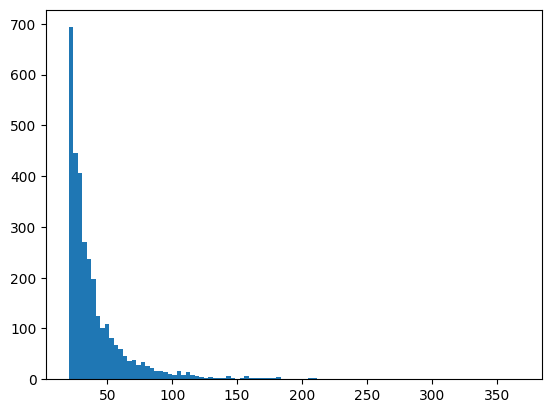

In [40]:
import matplotlib.pyplot as plt
plt.hist(y[y>20], bins=100)

## Test: Removing Outliers

While most of the 113679 entries have Rainfall values between 0 and 20, slightly more than 3000 of them have Rainfall values greater than 20. The largest of them go up to 367.6 cm of rain. Maybe these outliers are throwing off the model? I will test this out.

In [45]:
scaler = StandardScaler()

df_nooutliers = df_onehot[df_onehot["Rainfall"] <= 20]

X = df_nooutliers.drop(columns=["RainTomorrow", "Rainfall"])
y = df_nooutliers["Rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
linreg2 = LinearRegression()


In [46]:
linreg2.fit(X_train, y_train)

scores = cross_validate(linreg2, X_test, y_test, cv=5,
                        scoring=("r2", "neg_mean_squared_error"),
                        return_train_score=True)
scores

{'fit_time': array([0.05312729, 0.04956007, 0.0477457 , 0.04758811, 0.04576159]),
 'score_time': array([0.00151968, 0.00138354, 0.00140643, 0.00145411, 0.00151801]),
 'test_r2': array([0.57491414, 0.55084929, 0.55399653, 0.58642854, 0.56440961]),
 'train_r2': array([0.56744051, 0.57057915, 0.57283499, 0.56437758, 0.57000336]),
 'test_neg_mean_squared_error': array([-3.91379434, -4.19212195, -4.75099448, -4.13125459, -4.48452351]),
 'train_neg_mean_squared_error': array([-4.35580654, -4.31031116, -4.14684756, -4.30154385, -4.21325942])}

In [47]:
linreg2.score(X_test, y_test)

0.5678673734989212

In [18]:
y_pred_test_linear = linreg2.predict(X_test)

y_pred_test_linear[:10], y_test[:10]

(array([ 1.48136597,  2.07017212, -0.33998413,  1.33561402,  1.11582642,
         1.63316041,  0.05515748,  1.06889039,  1.07041626,  1.90110474]),
 111998     0.0
 37573     10.4
 1109       0.0
 77946      1.6
 92212      0.2
 95734      1.4
 101339     0.0
 111919     0.0
 84640      3.4
 91004      0.0
 Name: Rainfall, dtype: float64)

Getting rid of the outliers improved performance greatly (accuracy score went from 0.285 to 0.568). However, it is still a ways from "accurate".

## Test: PCA

On a related tangent: How many features can we drop using PCA without adversely affecting results?

In [81]:
from sklearn.decomposition import PCA

print("Results are in order of: First Approach, No Outliers, Partial fillna(), 'Original', DROP ALL, DROP ALL + No Outliers")
for altdf in [df_onehot, df_nooutliers, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers2]:
    for compcount in [4, 8, 16, 32, 48, 55, 62]: # 62 is same as keeping all values
        scaler = StandardScaler()
        X = altdf.drop(columns=["RainTomorrow", "Rainfall"])
        y = altdf["Rainfall"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        
        X_train = scaler.fit_transform(X_train)
        
        X_test = scaler.transform(X_test)
        pca = PCA(n_components=compcount)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        #X_train_pca = scaler.fit_transform(X_train_pca)
        #X_test_pca = scaler.transform(X_test_pca)
        
        linreg3 = LinearRegression()
        linreg3.fit(X_train_pca, y_train)
        
        scores = cross_validate(linreg3, X_test_pca, y_test, cv=5,
                                scoring=("r2", "neg_mean_squared_error"),
                                return_train_score=True)
        scores
        print(f"LinReg training with PCA keeping {compcount} features: {linreg3.score(X_test_pca, y_test)}")
    print("="*20)

Results are in order of: Original, No Outliers, Partial fillna(), 'Original', DROP ALL, DROP ALL + No Outliers
LinReg training with PCA keeping 4 features: 0.08894648939613037
LinReg training with PCA keeping 8 features: 0.18298393475654928
LinReg training with PCA keeping 16 features: 0.18573193321787795
LinReg training with PCA keeping 32 features: 0.1900765555068099
LinReg training with PCA keeping 48 features: 0.27873373991903405
LinReg training with PCA keeping 55 features: 0.28170549450361226
LinReg training with PCA keeping 62 features: 0.28563610139136175
LinReg training with PCA keeping 4 features: 0.15385938278124167
LinReg training with PCA keeping 8 features: 0.284011396418841
LinReg training with PCA keeping 16 features: 0.30060972304422573
LinReg training with PCA keeping 32 features: 0.31595057778438196
LinReg training with PCA keeping 48 features: 0.5593346843446206
LinReg training with PCA keeping 55 features: 0.5668729475039722
LinReg training with PCA keeping 62 feat

PCA dimensionality reduction did not seem to be useful. Removing more than around 1/4 of the features seems to significantly affect the LinReg performance.

## Test: use one of the alternate data sets

Perhaps one of the alternate sets I tested earlier might provide better results?

In [82]:
# df_onehot2, df_onehot_full, df_onehot_fulldrop
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

df_nooutliers2 = df_onehot_fulldrop[df_onehot_fulldrop["Rainfall"] <= 20]

print("Results are in order of: First Approach, No Outliers, Partial fillna(), 'Original', DROP ALL, DROP ALL + No Outliers")
for altdf in [df_onehot, df_nooutliers, df_onehot2, df_onehot_full, df_onehot_fulldrop, df_nooutliers2]:
    scaler = StandardScaler()
    X = altdf.drop(columns=["RainTomorrow", "Rainfall"])
    y = altdf["Rainfall"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    X_train = scaler.fit_transform(X_train)
    
    X_test = scaler.transform(X_test)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    scores = cross_validate(linreg, X_test, y_test, cv=5,
                        scoring=("r2", "neg_mean_squared_error"),
                        return_train_score=True)
    #print(scores)
    print(linreg.score(X_test, y_test))
    print("="*20)

Results are in order of: First Approach, No Outliers, Partial fillna(), 'Original', DROP ALL, DROP ALL + No Outliers
0.28564444673859757
0.5678673734989212
0.2925922181671935
0.2893272820840773
0.3265915901060741
0.5729311405979651


Conclusion: It seems that removing outliers strongly affected the model performance while other methods had weak success.

## Hunch: Manual Dimensional Reduction

A hunch: I will check for correlations between the other features and Rainfall.

In [11]:
df_corr = df_dropped2
for categorical in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    #df_corr = pd.concat([df_onehot, pd.get_dummies(df_onehot[categorical], prefix=categorical)], axis=1)
    df_corr.drop(columns=categorical, inplace=True)
#df_onehot.head(10)

In [12]:
df_corr.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
MinTemp,1.000000,0.736386,0.103938,0.177790,0.174976,0.175240,-0.233665,0.005780,-0.451053,-0.461716,0.901958,0.708891,0.055836,0.083637,0.039577,-0.203751,0.001618
MaxTemp,0.736386,1.000000,-0.074992,0.068142,0.013914,0.050802,-0.505033,-0.509430,-0.331514,-0.426803,0.887198,0.984540,-0.229192,-0.158017,0.057917,-0.164575,-0.000123
Rainfall,0.103938,-0.074992,1.000000,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.011192,-0.079657,0.501516,0.236461,-0.008956,-0.031371,0.001712
WindGustSpeed,0.177790,0.068142,0.133659,1.000000,0.604717,0.686974,-0.214948,-0.026313,-0.458080,-0.413292,0.150327,0.033091,0.155761,0.232613,-0.032668,0.060537,-0.009312
WindSpeed9am,0.174976,0.013914,0.087338,0.604717,1.000000,0.519893,-0.270401,-0.031060,-0.228087,-0.175030,0.128395,0.004068,0.103057,0.088547,-0.021692,0.051243,-0.009006
WindSpeed3pm,0.175240,0.050802,0.057887,0.686974,0.519893,1.000000,-0.145717,0.016508,-0.295508,-0.255151,0.163434,0.028220,0.080591,0.085881,-0.032498,0.060640,-0.010411
Humidity9am,-0.233665,-0.505033,0.224405,-0.214948,-0.270401,-0.145717,1.000000,0.667599,0.138807,0.186330,-0.472210,-0.499385,0.353708,0.255692,0.010858,-0.090837,0.015232
Humidity3pm,0.005780,-0.509430,0.255755,-0.026313,-0.031060,0.016508,0.667599,1.000000,-0.028401,0.051063,-0.221725,-0.558189,0.379020,0.444388,-0.009304,-0.018454,0.013333
Pressure9am,-0.451053,-0.331514,-0.168154,-0.458080,-0.228087,-0.295508,0.138807,-0.028401,1.000000,0.961304,-0.422301,-0.286353,-0.189781,-0.246575,0.031856,0.036281,-0.021469
Pressure3pm,-0.461716,-0.426803,-0.126534,-0.413292,-0.175030,-0.255151,0.186330,0.051063,0.961304,1.000000,-0.470021,-0.389255,-0.106130,-0.226744,0.026751,0.026774,-0.021850


In [32]:
corr = df_onehot.corr()["Rainfall"]
pd.set_option('display.max_rows', 65) # so that everything prints without ... in the middle
print(corr)

MinTemp            0.103665
MaxTemp           -0.077094
Rainfall           1.000000
WindGustSpeed      0.130520
WindSpeed9am       0.085815
WindSpeed3pm       0.060320
Humidity9am        0.239167
Humidity3pm        0.260051
Pressure9am       -0.167210
Pressure3pm       -0.126015
Temp9am            0.007195
Temp3pm           -0.080779
RainToday          0.497633
RainTomorrow       0.236698
Year              -0.010453
Month             -0.034330
Day                0.002964
WindGustDir_E     -0.014833
WindGustDir_ENE   -0.013331
WindGustDir_ESE    0.000313
WindGustDir_N     -0.029303
WindGustDir_NE    -0.018257
WindGustDir_NNE   -0.023555
WindGustDir_NNW   -0.015422
WindGustDir_NW    -0.004298
WindGustDir_S      0.028393
WindGustDir_SE     0.009334
WindGustDir_SSE    0.010988
WindGustDir_SSW    0.019063
WindGustDir_SW     0.009250
WindGustDir_W      0.012730
WindGustDir_WNW    0.006697
WindGustDir_WSW    0.013403
WindDir9am_E      -0.031894
WindDir9am_ENE    -0.027763
WindDir9am_ESE    -0

In [88]:
df_snip = df_nooutliers2[corr[(corr>0.05) | (corr<-0.05)].index.to_list()]
df_snip.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,33.4,0,0
6050,18.4,28.9,0.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,27.0,0,0
6052,19.4,37.6,0.0,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,34.9,0,0
6053,21.9,38.4,0.0,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,35.6,0,0
6054,24.2,41.0,0.0,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,37.6,0,0


In [134]:
scaler = StandardScaler()
X = df_snip.drop(columns=["RainTomorrow", "Rainfall"])
y = df_snip["Rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_validate(linreg, X_test, y_test, cv=5,
                    scoring=("r2", "neg_mean_squared_error"),
                    return_train_score=True)
#print(scores)
print(linreg.score(X_test, y_test))
#print("="*20)

0.5698681533199695


By manually selecting 13 columns based on correlation with RainToday, I achieved results almost as good as those on the full data set while keeping only 12 features in X. This is superior to the PCA results for keeping 16 features.

## Test: Escalate to ANN

It is possible that the LinearRegression model is not powerful enough to learn the mapping between X and y. I will now escalate to a fully-connected artificial neural network to try and predict Rainfall levels.

I will not be training neural networks for classifying given days as having rained or not, since the basic LogReg seems to already offer sufficiently accurate performances there.

In [150]:
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
X = df_nooutliers2.drop(columns=["RainTomorrow", "Rainfall"])
y = df_nooutliers2["Rainfall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes = [64,32,16,8],
                   activation="relu", solver="adam",
                   verbose=True, learning_rate="adaptive",
                   learning_rate_init = 0.002, random_state=2501,
                   batch_size=160, max_iter=512, early_stopping=True) # arbitrarily chosen hyperparams

mlp.fit(X_train,y_train)

Iteration 1, loss = 2.45617479
Validation score: 0.593106
Iteration 2, loss = 2.01005582
Validation score: 0.604379
Iteration 3, loss = 1.92232649
Validation score: 0.595057
Iteration 4, loss = 1.86441848
Validation score: 0.589246
Iteration 5, loss = 1.78263019
Validation score: 0.578090
Iteration 6, loss = 1.71711793
Validation score: 0.572280
Iteration 7, loss = 1.63281835
Validation score: 0.549096
Iteration 8, loss = 1.54913821
Validation score: 0.548659
Iteration 9, loss = 1.48230787
Validation score: 0.515908
Iteration 10, loss = 1.37613104
Validation score: 0.541589
Iteration 11, loss = 1.29136790
Validation score: 0.506019
Iteration 12, loss = 1.20159057
Validation score: 0.466115
Iteration 13, loss = 1.11485236
Validation score: 0.489479
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(batch_size=160, early_stopping=True,
             hidden_layer_sizes=[64, 128, 64], learning_rate='adaptive',
             learning_rate_init=0.002, max_iter=512, random_state=2501,
             verbose=True)

Layer/neyrons, best loss/validation score (if any), epochs required, changes from before:    
[32, 64, 32], 2.55, did not record iteration count    
[64, 64], 1.795, 512 (reached limit, did not converge)    
[64, 128, 64], 1.676, 512 (reached limit, did not converge)    
[64, 128, 64], 1.676, 512 (switched learning rate from constant to adaptive; inverse scaling didn't get past 20 epochs)    
[64, 128, 64], 0.835, 512 (switched solver from SGD to Adam)    
[64, 64], 1.538, 512 (Adam, adaptive)    
[64, 64], 1.873, 370 (Adam, adaptive, changed activation to ReLU)    
[64, 32, 16, 8]: 1.810, 295 (Adam, adaptive, ReLU)    
[32, 32, 16, 8]: 2.386, 314    
[32, 32, 16, 8]: 2.06, 69 (default hyperparams, using df_snip to speed up training)    
[32, 32, 16, 8]: 2.003/0.56, 41 (logistic -> ReLU, turned on early stopping)    
[32, 32, 16, 8]: 1.927/0.584, 85 (ReLU, adaptive)    
[32, 32, 16, 8]: 1.932/0.569, 41 (ReLU, Adam)     
[64, 32, 16, 8]: 1.899/0.569, 77 (ReLU, adaptive)    
[32, 32, 16, 8]: 1.826/0.559, 28 (using df_nooutliers2)    
[32, 32, 16, 8]: 1.595/0.543, 28 (Adam, using df_nooutliers2)    
[32, 32, 16, 8]: 1.460/0.526, 16 (ReLU, Adam, using df_nooutliers2)    
[32, 32, 16, 8]: 1.217/0.468, 16 (ReLU, adaptive, using df_nooutliers2)    
[64, 32, 16, 8]: 1.2749/0.519, 77 (ReLU, Adam, df_nooutliers2)    
[64, 32, 16, 8]: 1.215/0.515, 15 (ReLU, Adam, df_nooutliers2, batch 128)    

In [151]:
"""
I ran this cell repeatedly for different iterations of the multi-layer perceptron.
Previous runs are not reflected in the out section.

Scores against the testing sets (1.0 is best)
[64, 128, 64], Adam + adaptive learning: -0.2779
[64, 64], Adam + adaptive learning: -0.2354
[64, 64], Adam + adaptive + ReLU: -0.0389
[64, 32, 16, 8], Adam + adaptive + ReLU: -0.0400
[32, 32, 16, 8], Adam + adaptive + ReLU: 0.0856
[32, 32, 16, 8], default, using df_trim: 0.593
[32, 32, 16, 8], ReLU + early stop: 0.595
[32, 32, 16, 8], ReLU + early stop + adaptive: 0.598
[32, 32, 16, 8], ReLU + early stop + Adam: 0.595
[64, 32, 16, 8]: ReLU + early stop: 0.598
[32, 32, 16, 8]: df_nooutliers2: 0.604
[32, 32, 16, 8]: ReLU + Adam + df_nooutliers2: 0.596
[32, 32, 16, 8]: ReLU + adaptive + df_nooutliers2: 0.600
[64, 32, 16, 8]: ReLU + Adam + df_nooutliers2: 0.590
[64, 32, 16, 8]: ReLU + Adam + df_nooutliers2 + batch 128: 0.597
"""

mlp.score(X_test, y_test)

0.5952649510726109

In [63]:
y_pred = mlp.predict(X_test)
y_pred[:10], y_test[:10]

(array([ 3.61863130e-01,  2.81697366e+00,  7.38315181e-02,  1.71407844e+00,
         1.29087691e+00,  2.80564291e-01, -8.01532760e-04,  7.34125373e-02,
         4.48380188e-01,  1.20673468e+00]),
 111998     0.0
 37573     10.4
 1109       0.0
 77946      1.6
 92212      0.2
 95734      1.4
 101339     0.0
 111919     0.0
 84640      3.4
 91004      0.0
 Name: Rainfall, dtype: float64)

In [65]:
y_pred[:10] - y_test[:10]

111998    0.361863
37573    -7.583026
1109      0.073832
77946     0.114078
92212     1.090877
95734    -1.119436
101339   -0.000802
111919    0.073413
84640    -2.951620
91004     1.206735
Name: Rainfall, dtype: float64